In [2]:
import pandas as pd

In [3]:
# Create DataFrame out of list of lists
data = [
    [1, 'Alice', 25],
    [2, 'Bob', 30],
    [3, 'Charlie', 35]
]

# Define column names
columns = ['ID', 'Name', 'Age']

# Create DataFrame
df = pd.DataFrame(data, columns=columns)
df

,ID,Name,Age
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,35


In [7]:
# Create DataFrame out of a dict
data_dict = {
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35]
}

# Create DataFrame
df = pd.DataFrame(data_dict)
df

,ID,Name,Age
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,35


In [8]:
df.to_csv('data.csv', index=False)

df = pd.read_csv('data.csv')
print(df.head())  # Display first 5 rows

# Options:
# sep=';' -> Change delimiter if CSV is not comma-separated.
# header=None -> If there’s no header row, specify column names with names=['col1', 'col2'].
# usecols=['col1', 'col3'] -> Load only specific columns.
# dtype={'col1': str, 'col2': int} -> Define column data types.

   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35


In [9]:
df.to_json('data.jsonl', orient='records', lines=True)

df = pd.read_json('data.jsonl', orient='records', lines=True)

df

,ID,Name,Age
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,35


In [7]:
from IPython.display import display
# How to display the first and last `n` rows of a DataFrame?**
n = 3
display(df.head(n))
display(df.tail(n))

,ID,Name,Age
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,35


,ID,Name,Age
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,35


### **Data Manipulation**

In [12]:
# How to select a single column and multiple columns in a DataFrame?
display(df['ID'])
display(df[['ID', 'Name']])

,ID
0,1
1,2
2,3


,ID,Name
0,1,Alice
1,2,Bob
2,3,Charlie


In [2]:
# What is the difference between `.loc[]` and `.iloc[]`?
import pandas as pd

# case 1: the '.loc[]' is used for label-based indexing
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'City': ['NY', 'LA', 'SF']}
df = pd.DataFrame(data, index=['A', 'B', 'C'])

display(df.loc['A'])            # Select row with index label 'A'
display(df.loc[['A', 'C']])     # Select multiple rows using labels

# Select rows and specific columns
print(f'{df.loc['A', 'Age']=}')                 # Single value
display(df.loc[['A', 'B'], ['Name', 'City']])   # Subset

# Slicing with labels (inclusive)
display(df.loc['A':'B'])  # Includes 'B'

Name    Alice
Age        25
City       NY
Name: A, dtype: object

,Name,Age,City
A,Alice,25,NY
C,Charlie,35,SF


df.loc['A', 'Age']=np.int64(25)


,Name,City
A,Alice,NY
B,Bob,LA


,Name,Age,City
A,Alice,25,NY
B,Bob,30,LA


In [5]:
# case 2: the '.iloc[]' is used for integer-based indexing

print(f'{df.iloc[0]}=')       # Select first row (index 0)

print('First two rows')
display(df.iloc[:2])    # Select first two rows

# Select specific rows and columns by position
print(f'Value selection: first row second column = {df.iloc[0, 1]}')

print('Values selection: row (1, 3), column (0, 2)= ')
display(df.iloc[[0, 2], [0, 2]])


Name    Alice
Age        25
City       NY
Name: A, dtype: object=
First two rows


,Name,Age,City
A,Alice,25,NY
B,Bob,30,LA


Value selection: first row second column = 25
Values selection: row (1, 3), column (0, 2)= 


,Name,City
A,Alice,NY
C,Charlie,SF


In [15]:
# Filter rows based on a condition?
df[df['Age'] >= 30]

,ID,Name,Age
1,2,Bob,30
2,3,Charlie,35


In [ ]:
# How to replace missing values in a DataFrame?
df = df.fillna(value='fill_in_value')
df = df.dropna()

In [16]:
# How to add a new column to an existing DataFrame?
df['id_mult'] = df['ID'] * 3
df

,ID,Name,Age,id_mult
0,1,Alice,25,3
1,2,Bob,30,6
2,3,Charlie,35,9


In [17]:
# How to rename a column in Pandas?**
df.rename(columns={'id_mult': 'id_multiplication'}, inplace=True)
df

,ID,Name,Age,id_multiplication
0,1,Alice,25,3
1,2,Bob,30,6
2,3,Charlie,35,9


In [20]:
import pandas as pd

data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C', 'C'],
    'Value': [10, 20, 30, 40, 50, 60, 70]
}
df = pd.DataFrame(data)

# Compute mean, sum, and count for each group
result = df.groupby('Category').agg({'Value': ['mean', 'sum', 'count']})
print(result)

         Value           
          mean  sum count
Category                 
A         30.0   90     3
B         30.0   60     2
C         65.0  130     2


### **Aggregation & Grouping**

In [37]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Helen', 'Ivy', 'Jack'],
    'Age': [25, 30, 35, 28, 26, 33, 27, 31, 29, 34],
    'City': ['NY', 'LA', 'SF', 'BOS', 'HOU', 'SEA', 'SEA', 'BOS', 'ATL', 'SEA'],
    'Salary': [60000, 70000, 80000, 72000, 65000, 75000, 68000, 71000, 67000, 73000]
}

df = pd.DataFrame(data)
display(df)

# How to group data in Pandas?
display(df.groupby('City').agg({'Salary': 'sum'}))

# How to compute mean, sum and count per group
display(df.groupby('City').agg({'Salary': ['mean', 'sum', 'count']}))

,Name,Age,City,Salary
0,Alice,25,NY,60000
1,Bob,30,LA,70000
2,Charlie,35,SF,80000
3,David,28,BOS,72000
4,Emma,26,HOU,65000
5,Frank,33,SEA,75000
6,Grace,27,SEA,68000
7,Helen,31,BOS,71000
8,Ivy,29,ATL,67000
9,Jack,34,SEA,73000


,Salary
City,
ATL,67000
BOS,143000
HOU,65000
LA,70000
NY,60000
SEA,216000
SF,80000


Salary              
         mean     sum count
City                       
ATL   67000.0   67000     1
BOS   71500.0  143000     2
HOU   65000.0   65000     1
LA    70000.0   70000     1
NY    60000.0   60000     1
SEA   72000.0  216000     3
SF    80000.0   80000     1

In [40]:
# How to pivot a DataFrame?

# Pivoting: Cities become columns, Salary is the value
pivot_df = df.pivot_table(index='Name', columns='City', values='Salary')
pivot_df


City,ATL,BOS,HOU,LA,NY,SEA,SF
Name,,,,,,,
Alice,NaN,NaN,NaN,NaN,60000.0,NaN,NaN
Bob,NaN,NaN,NaN,70000.0,NaN,NaN,NaN
Charlie,NaN,NaN,NaN,NaN,NaN,NaN,80000.0
David,NaN,72000.0,NaN,NaN,NaN,NaN,NaN
Emma,NaN,NaN,65000.0,NaN,NaN,NaN,NaN
Frank,NaN,NaN,NaN,NaN,NaN,75000.0,NaN
Grace,NaN,NaN,NaN,NaN,NaN,68000.0,NaN
Helen,NaN,71000.0,NaN,NaN,NaN,NaN,NaN
Ivy,67000.0,NaN,NaN,NaN,NaN,NaN,NaN


### **Sorting & Indexing**

In [41]:
# How to sort a Pandas DataFrame by multiple columns?
df.sort_values(by=['Age', 'Salary'], ascending=[True, False])

,Name,Age,City,Salary
0,Alice,25,NY,60000
4,Emma,26,HOU,65000
6,Grace,27,SEA,68000
3,David,28,BOS,72000
8,Ivy,29,ATL,67000
1,Bob,30,LA,70000
7,Helen,31,BOS,71000
5,Frank,33,SEA,75000
9,Jack,34,SEA,73000
2,Charlie,35,SF,80000


In [42]:
# How to reset or set an index?
df.set_index('Name')
display(df)

df.reset_index()
display(df)

,Name,Age,City,Salary
0,Alice,25,NY,60000
1,Bob,30,LA,70000
2,Charlie,35,SF,80000
3,David,28,BOS,72000
4,Emma,26,HOU,65000
5,Frank,33,SEA,75000
6,Grace,27,SEA,68000
7,Helen,31,BOS,71000
8,Ivy,29,ATL,67000
9,Jack,34,SEA,73000


,Name,Age,City,Salary
0,Alice,25,NY,60000
1,Bob,30,LA,70000
2,Charlie,35,SF,80000
3,David,28,BOS,72000
4,Emma,26,HOU,65000
5,Frank,33,SEA,75000
6,Grace,27,SEA,68000
7,Helen,31,BOS,71000
8,Ivy,29,ATL,67000
9,Jack,34,SEA,73000


### **Merging & Joining**

In [44]:
# How to merge two DataFrames?
import pandas as pd

df1 = pd.DataFrame({
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'],
    'Age': [25, 30, 35, 28, 26]
})

df2 = pd.DataFrame({
    'ID': [3, 4, 5, 6, 7],  # Overlapping and new IDs
    'City': ['NY', 'LA', 'SF', 'CHI', 'HOU'],
    'Salary': [80000, 72000, 75000, 68000, 70000]
})

# Display both DataFrames
print('DataFrame 1:')
display(df1)

print('DataFrame 2:')
display(df2)

inner_merge = pd.merge(df1, df2, on='ID', how='inner')
print('Inner join: Keeps only matching IDs')
display(inner_merge)

left_merge = pd.merge(df1, df2, on='ID', how='left')
print('Left Join: Keeps all rows from df1, fills missing values from df2')
display(left_merge)

right_merge = pd.merge(df1, df2, on='ID', how='right')
print('Right Join: Keeps all rows from df2, fills missing values from df1')
display(right_merge)

outer_merge = pd.merge(df1, df2, on='ID', how='outer')
print('Outer Join: Keeps all unique values from both DataFrames')
display(outer_merge)

DataFrame 1:


,ID,Name,Age
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,35
3,4,David,28
4,5,Emma,26


DataFrame 2:


,ID,City,Salary
0,3,NY,80000
1,4,LA,72000
2,5,SF,75000
3,6,CHI,68000
4,7,HOU,70000


Inner join: Keeps only matching IDs


,ID,Name,Age,City,Salary
0,3,Charlie,35,NY,80000
1,4,David,28,LA,72000
2,5,Emma,26,SF,75000


Left Join: Keeps all rows from df1, fills missing values from df2


,ID,Name,Age,City,Salary
0,1,Alice,25,NaN,NaN
1,2,Bob,30,NaN,NaN
2,3,Charlie,35,NY,80000.0
3,4,David,28,LA,72000.0
4,5,Emma,26,SF,75000.0


Right Join: Keeps all rows from df2, fills missing values from df1


,ID,Name,Age,City,Salary
0,3,Charlie,35.0,NY,80000
1,4,David,28.0,LA,72000
2,5,Emma,26.0,SF,75000
3,6,NaN,NaN,CHI,68000
4,7,NaN,NaN,HOU,70000


Outer Join: Keeps all unique values from both DataFrames


,ID,Name,Age,City,Salary
0,1,Alice,25.0,NaN,NaN
1,2,Bob,30.0,NaN,NaN
2,3,Charlie,35.0,NY,80000.0
3,4,David,28.0,LA,72000.0
4,5,Emma,26.0,SF,75000.0
5,6,NaN,NaN,CHI,68000.0
6,7,NaN,NaN,HOU,70000.0



# What is the difference between `merge()`, `join()`, and `concat()` in Pandas?

### merge() – SQL-style Joins (Flexible)

- Similar to SQL JOIN operations.
- Uses keys (columns) to match rows.
- Supports inner, left, right, and outer joins.

### join() – Index-Based Merging

- Similar to merge(), but joins on the index instead of columns.
- Default join type is left.
- Can be used with set_index().

### concat() – Stacking DataFrames (Row-wise or Column-wise)

- Used for appending (row-wise) or extending (column-wise).
- Does not require keys like merge().
- Works with axis=0 (rows) or axis=1 (columns).


### **Simple Pandas Programming Tasks**

In [1]:
# Create a DataFrame with 3 columns and 5 rows of random integers between 1 and 100
import numpy as np
import pandas as pd

def generate_random_dataframe(rows: int, cols: int, fill_value: float|int|None = None) -> pd.DataFrame:
    if fill_value is None:
        data = np.random.randint(0, 101, size=(rows, cols))
    else:
        data = np.full(shape=(rows, cols), fill_value=fill_value)
    col_names = [f'Col_{i + 1}' for i in range(cols)]  # Column names: Col_1, Col_2, ...
    return pd.DataFrame(data, columns=col_names)

df = generate_random_dataframe(rows=5, cols=3)
display(df)


,Col_1,Col_2,Col_3
0,8,32,46
1,80,93,73
2,20,43,36
3,72,63,29
4,34,67,0


In [51]:
import pandas as pd
import numpy as np

# Create a DataFrame with missing values
data = {
    'A': [10, 20, np.nan, 40, 50, np.nan, 30, 80, 90, 25, 15],
    'B': [100, 200, 150, np.nan, 300, 350, np.nan, 400, 450, 250, np.nan],
    'C': ['X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y'],
    'D': [1, 2, 3, 4, 5, 6, 7, 2, 3, 1, 2]
}

df = pd.DataFrame(data)
display(df)

,A,B,C,D
0,10.0,100.0,X,1
1,20.0,200.0,Y,2
2,NaN,150.0,Z,3
3,40.0,NaN,X,4
4,50.0,300.0,Y,5
5,NaN,350.0,Z,6
6,30.0,NaN,X,7
7,80.0,400.0,Y,2
8,90.0,450.0,Z,3
9,25.0,250.0,X,1


In [52]:
# Find the number of missing values in each column.

print(f'{df.isna().sum()}=')

A    2
B    3
C    0
D    0
dtype: int64=
A    2
B    3
C    0
D    0
dtype: int64=


In [54]:
# Replace all NaN values with the mean of their respective columns
df_filled = df.copy()
df_filled.fillna(value=df_filled.mean(numeric_only=True), inplace=True)
display(df_filled)

,A,B,C,D
0,10.0,100.0,X,1
1,20.0,200.0,Y,2
2,40.0,150.0,Z,3
3,40.0,275.0,X,4
4,50.0,300.0,Y,5
5,40.0,350.0,Z,6
6,30.0,275.0,X,7
7,80.0,400.0,Y,2
8,90.0,450.0,Z,3
9,25.0,250.0,X,1


In [60]:
# Extract all rows where column `A` has values between 10 and 50
filtered_df = df[df['A'].between(10, 50, inclusive='both')]
display(filtered_df)

filtered_df = df[df['A'].notna() & (10 <= df['A']) & (df['A'] <= 50)]
display(filtered_df)


,A,B,C,D
0,10.0,100.0,X,1
1,20.0,200.0,Y,2
3,40.0,NaN,X,4
4,50.0,300.0,Y,5
6,30.0,NaN,X,7
9,25.0,250.0,X,1
10,15.0,NaN,Y,2


,A,B,C,D
0,10.0,100.0,X,1
1,20.0,200.0,Y,2
3,40.0,NaN,X,4
4,50.0,300.0,Y,5
6,30.0,NaN,X,7
9,25.0,250.0,X,1
10,15.0,NaN,Y,2


In [62]:
# Drop duplicate rows based on a specific column

df_deduplicated = df_filled.drop_duplicates(subset=['C'], keep='first', inplace=False)
display(df_deduplicated)

,A,B,C,D
0,10.0,100.0,X,1
1,20.0,200.0,Y,2
2,40.0,150.0,Z,3


#### **Data Transformations**

In [65]:
# Convert a column to datetime format
import pandas as pd

data = {
    'ID': [1, 2, 3, 4, 5, 6, 7],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace'],
    'Timestamp_Str': ['2024-01-01 10:30:00', '2024-02-15 14:45:00', '2024-03-20 08:10:00',
                      '2024-04-10 16:20:00', '2024-05-05 12:00:00', '2024-06-18 09:30:00', '2024-07-25 18:15:00'],
    'Epoch_Time': [1704100200, 1708008300, 1710912600, 1712763600, 1714910400, 1718693400, 1721912100]
}

df = pd.DataFrame(data)

df['dt_from_str'] = pd.to_datetime(df['Timestamp_Str'])
df['dt_from_str'] = pd.to_datetime(df['Timestamp_Str'], format='%Y-%m-%d %H:%M:%S')

df['dt_from_epoch'] = pd.to_datetime(df['Epoch_Time'], unit='s')
display(df)


,ID,Name,Timestamp_Str,Epoch_Time,dt_from_str,dt_from_epoch
0,1,Alice,2024-01-01 10:30:00,1704100200,2024-01-01 10:30:00,2024-01-01 09:10:00
1,2,Bob,2024-02-15 14:45:00,1708008300,2024-02-15 14:45:00,2024-02-15 14:45:00
2,3,Charlie,2024-03-20 08:10:00,1710912600,2024-03-20 08:10:00,2024-03-20 05:30:00
3,4,David,2024-04-10 16:20:00,1712763600,2024-04-10 16:20:00,2024-04-10 15:40:00
4,5,Emma,2024-05-05 12:00:00,1714910400,2024-05-05 12:00:00,2024-05-05 12:00:00
5,6,Frank,2024-06-18 09:30:00,1718693400,2024-06-18 09:30:00,2024-06-18 06:50:00
6,7,Grace,2024-07-25 18:15:00,1721912100,2024-07-25 18:15:00,2024-07-25 12:55:00


In [67]:
# Calculate the rolling mean of a numeric column with a window size of 3.

import pandas as pd
import numpy as np

data = {
    'ID': range(1, 11),
    'Value': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

df = pd.DataFrame(data)
df['Rolling_Mean'] = df['Value'].rolling(window=3).mean()
display(df)

df['Rolling_Mean'] = df['Value'].rolling(window=3, min_periods=1).mean()
display(df)


,ID,Value,Rolling_Mean
0,1,10,NaN
1,2,20,NaN
2,3,30,20.0
3,4,40,30.0
4,5,50,40.0
5,6,60,50.0
6,7,70,60.0
7,8,80,70.0
8,9,90,80.0
9,10,100,90.0


,ID,Value,Rolling_Mean
0,1,10,10.0
1,2,20,15.0
2,3,30,20.0
3,4,40,30.0
4,5,50,40.0
5,6,60,50.0
6,7,70,60.0
7,8,80,70.0
8,9,90,80.0
9,10,100,90.0


In [69]:
# Normalize a numerical column to a range between 0 and 1
df['normalized_value'] = (df['Value'] - df['Value'].min()) / (df['Value'].max() - df['Value'].min())
display(df)

,ID,Value,Rolling_Mean,normalized_value
0,1,10,10.0,0.000000
1,2,20,15.0,0.111111
2,3,30,20.0,0.222222
3,4,40,30.0,0.333333
4,5,50,40.0,0.444444
5,6,60,50.0,0.555556
6,7,70,60.0,0.666667
7,8,80,70.0,0.777778
8,9,90,80.0,0.888889
9,10,100,90.0,1.000000


In [76]:
# Find the most frequently occurring value(s) in a column.

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Helen', 'Ivy', 'Jack'],
    'Age': [25, 30, 35, 28, 26, 33, 27, 31, 29, 34],
    'City': ['NY', 'LA', 'SF', 'BOS', 'HOU', 'SEA', 'SEA', 'BOS', 'ATL', 'SEA'],
    'Salary': [60000, 70000, 80000, 72000, 65000, 75000, 68000, 71000, 67000, 73000]
}

df = pd.DataFrame(data)
display(df)

# df['City'].mode()

# Find the top 3 most common values in a column
top_3 = df['City'].value_counts().nlargest(3)
print(top_3)

# Find the top value
print(top_3.index.values[0])

,Name,Age,City,Salary
0,Alice,25,NY,60000
1,Bob,30,LA,70000
2,Charlie,35,SF,80000
3,David,28,BOS,72000
4,Emma,26,HOU,65000
5,Frank,33,SEA,75000
6,Grace,27,SEA,68000
7,Helen,31,BOS,71000
8,Ivy,29,ATL,67000
9,Jack,34,SEA,73000


City
SEA    3
BOS    2
NY     1
Name: count, dtype: int64
SEA


In [81]:
# Calculate the cumulative sum of a column.

# The cumulative sum (also called running total) computes the sum of a column progressively row by row.
df['Cumulative_Sum'] = df['Salary'].fillna(0).cumsum()
display(df)

df['Cumulative_Sum'] = df.groupby('City')['Salary'].cumsum()
display(df)


,Name,Age,City,Salary,Cumulative_Sum
0,Alice,25,NY,60000,60000
1,Bob,30,LA,70000,130000
2,Charlie,35,SF,80000,210000
3,David,28,BOS,72000,282000
4,Emma,26,HOU,65000,347000
5,Frank,33,SEA,75000,422000
6,Grace,27,SEA,68000,490000
7,Helen,31,BOS,71000,561000
8,Ivy,29,ATL,67000,628000
9,Jack,34,SEA,73000,701000


,Name,Age,City,Salary,Cumulative_Sum
0,Alice,25,NY,60000,60000
1,Bob,30,LA,70000,70000
2,Charlie,35,SF,80000,80000
3,David,28,BOS,72000,72000
4,Emma,26,HOU,65000,65000
5,Frank,33,SEA,75000,75000
6,Grace,27,SEA,68000,143000
7,Helen,31,BOS,71000,143000
8,Ivy,29,ATL,67000,67000
9,Jack,34,SEA,73000,216000


In [83]:
# Write a function to detect outliers in a column using the IQR method.
import pandas as pd

def detect_outliers_iqr(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Detect outliers in a column using the IQR (Interquartile Range) method.

    Args:
        df (pd.DataFrame): Input DataFrame.
        column (str): Column to check for outliers.

    Returns:
        pd.DataFrame: A subset of the DataFrame containing only the outliers.
    """
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers


data = {
    'ID': range(1, 11),
    'Values': [10, 12, 14, 18, 22, 30, 32, 34, 100, 150]  # 100 and 150 are outliers
}

df = pd.DataFrame(data)

outliers_df = detect_outliers_iqr(df, 'Values')
display(outliers_df)

# remove outliers from the DataFrame
df_clean = df[~df['Values'].isin(outliers_df['Values'])]
display(df_clean)

,ID,Values
8,9,100
9,10,150


,ID,Values
0,1,10
1,2,12
2,3,14
3,4,18
4,5,22
5,6,30
6,7,32
7,8,34


,Age,Salary
Age,1.000000,0.980226
Salary,0.980226,1.000000


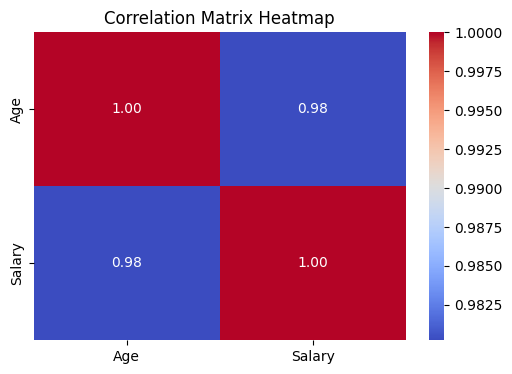

,Age,Salary,Shift_Num
Age,1.000000,0.980226,0.032476
Salary,0.980226,1.000000,0.083538
Shift_Num,0.032476,0.083538,1.000000


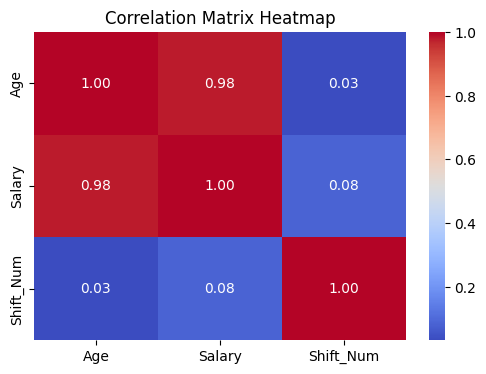

In [90]:
# Compute correlation between numeric columns in a DataFrame
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace', 'Helen', 'Ivy', 'Jack'],
    'Age': [25, 30, 35, 28, 40, 50, 27, 45, 38, 29],
    'Salary': [60000, 70000, 80000, 72000, 90000, 100000, 68000, 95000, 87000, 73000],
    'Shift': ['Morning', 'Afternoon', 'Night', 'Morning', 'Night', 'Afternoon',
              'Morning', 'Night', 'Afternoon', 'Morning']  # Categorical
}

df = pd.DataFrame(data)
correlation_matrix = df[['Age', 'Salary']].corr()
display(correlation_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Convert the Shift column into numerical values using Label Encoding:
df['Shift_Num'] = df['Shift'].astype('category').cat.codes
correlation_matrix_with_categorical = df[['Age', 'Salary', 'Shift_Num']].corr()
display(correlation_matrix_with_categorical)


plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix_with_categorical, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [91]:
# Apply a custom function to a column using `.apply()`
import pandas as pd

data = {
    'First_Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Last_Name': ['Smith', 'Johnson', 'Williams', 'Brown'],
    'Age': [25, 30, 35, 40]
}

df = pd.DataFrame(data)

# Define a function to apply row-wise
def create_full_name(row):
    return f'{row['First_Name']} {row['Last_Name']}'

df['Full_Name'] = df.apply(create_full_name, axis=1)
display(df)


,First_Name,Last_Name,Age,Full_Name
0,Alice,Smith,25,Alice Smith
1,Bob,Johnson,30,Bob Johnson
2,Charlie,Williams,35,Charlie Williams
3,David,Brown,40,David Brown
